In [1]:
import pickle
from mapie.regression import MapieRegressor
from sklearn.neural_network import MLPRegressor
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import plotting
from plotting import plot_accuracy_single
import ml_models
import numpy as np

In [2]:
# Load test data set and trained models
test_data = pickle.load(open('data/2d_splitmig/test_data','rb'))
mapie_nu1 = pickle.load(open('data/2d_splitmig/mapie_nu1', 'rb'))
mapie_nu2 = pickle.load(open('data/2d_splitmig/mapie_nu2', 'rb'))
mapie_T = pickle.load(open('data/2d_splitmig/mapie_T', 'rb'))
mapie_m = pickle.load(open('data/2d_splitmig/mapie_m', 'rb'))

In [21]:
# unpack test data set
# test_data[i] with i = 1,2,3 depending on theta case
X_test = [test_data[3][params].data.flatten()
          for params in test_data[3]]
y_test = [params for params in test_data[3]]
# separate each param
nu1_test = [params[0] for params in y_test]
nu2_test = [params[1] for params in y_test]
T_test = [params[2] for params in y_test]
m_test = [params[3] for params in y_test]

In [22]:
# implementing MAPIE test
alpha = [0.05, 0.1, 0.2, 0.5, 0.7, 0.85]
# for nu1
nu1_pred, nu1_pis = mapie_nu1.predict(X_test, alpha=alpha)
# for nu2
nu2_pred, nu2_pis = mapie_nu2.predict(X_test, alpha=alpha)
# for T
T_pred, T_pis = mapie_T.predict(X_test, alpha=alpha)
# for m
m_pred, m_pis = mapie_m.predict(X_test, alpha=alpha)

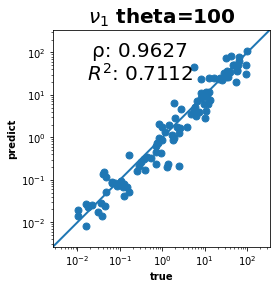

In [23]:
nu1_test_log = [10**p_true for p_true in nu1_test]
nu1_pred_log = [10**p_pred for p_pred in nu1_pred]
r2 = ml_models.r2(nu1_test_log, nu1_pred_log)[0]
rho = ml_models.rho(nu1_test_log, nu1_pred_log)
plot_accuracy_single(nu1_test_log, nu1_pred_log, x_label="true",
                         y_label="predict", size=[6, 2, 20], log=True, r2=r2, rho=rho, title = r'$ν_1$'+ ' '+ 'theta=100')

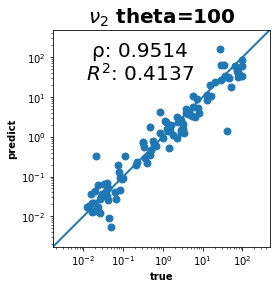

In [24]:
nu2_test_log = [10**p_true for p_true in nu2_test]
nu2_pred_log = [10**p_pred for p_pred in nu2_pred]
r2 = ml_models.r2(nu2_test_log, nu2_pred_log)[0]
rho = ml_models.rho(nu2_test_log, nu2_pred_log)
plot_accuracy_single(nu2_test_log, nu2_pred_log, size=[6, 2, 20], log=True, r2=r2, rho=rho, title = r'$ν_2$'+ ' '+ 'theta=100')

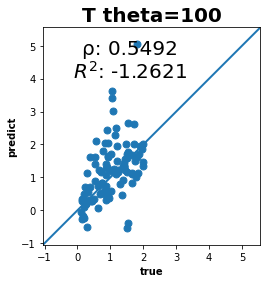

In [36]:
r2 = ml_models.r2(T_test, T_pred)[0]
rho = ml_models.rho(T_test, T_pred)
plot_accuracy_single(T_test, list(T_pred), size=[6, 2, 20], log=False, r2=r2, rho=rho, title = 'T'+ ' '+ 'theta=100')

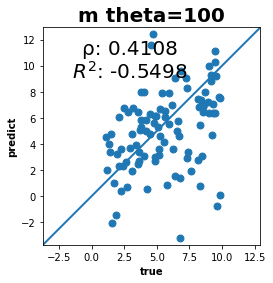

In [37]:
r2 = ml_models.r2(m_test, m_pred)[0]
rho = ml_models.rho(m_test, m_pred)
plot_accuracy_single(m_test, list(m_pred), size=[6, 2, 20], log=False, r2=r2, rho=rho, title='m'+ ' '+ 'theta=100')

In [31]:
list_a = [float(1),float(2),float(3)]
list_b = [float(4),float(5),float(6)]
list_a+list_b

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [30]:
type(list_a[0])

float

In [35]:
len(T_test+list(T_pred))

200

In [34]:
type(T_pred)

numpy.ndarray